## Creating Functions

If we only had one data set to analyze,
it would probably be faster to load the file into a spreadsheet
and use that to plot some simple statistics.
But we have twelve files to check,
and may have more in future.
In this lesson,
we'll learn how to write a function
so that we can repeat several operations with a single command.

#### Objectives

*   Define a function that takes parameters.
*   Return a value from a function.
*   Test and debug a function.
*   Explain what a call stack is, and trace changes to the call stack as functions are called.
*   Set default values for function parameters.
*   Explain why we should divide programs into small, single-purpose functions.

### Defining a Function

Let's start by defining a function `fahr_to_kelvin` that converts temperatures from Fahrenheit to Kelvin:

In [1]:
def fahr_to_kelvin(temp):
    return ((temp - 32) * (5/9)) + 273.15

The definition opens with the word `def`,
which is followed by the name of the function
and a parenthesized list of parameter names.
The [body](../../gloss.html#function-body) of the function&mdash;the
statements that are executed when it runs&mdash;is indented below the definition line,
typically by four spaces.

When we call the function,
the values we pass to it are assigned to those variables
so that we can use them inside the function.
Inside the function,
we use a [return statement](../../gloss.html#return-statement) to send a result back to whoever asked for it.

Let's try running our function.
Calling our own function is no different from calling any other function:

In [2]:
print 'freezing point of water:', fahr_to_kelvin(32)
print 'boiling point of water:', fahr_to_kelvin(212)

freezing point of water: 273.15
boiling point of water: 273.15


We've successfully called the function that we defined,
and we have access to the value that we returned.
Unfortunately, the value returned doesn't look right.
What went wrong?

### Debugging a Function

*Debugging* is when we fix a piece of code
that we know is working incorrectly.
In this case, we know that `fahr_to_kelvin`
is giving us the wrong answer,
so let's find out why.

For big pieces of code,
there are tools called *debuggers* that aid in this process.

We just have a short function,
so we'll debug by choosing some parameter value,
breaking our function into small parts,
and printing out the value of each part.

In [3]:
# We'll use temp = 212, the boiling point of water, which was incorrect
print "212 - 32:", 212 - 32

212 - 32: 180


In [4]:
print "(212 - 32) * (5/9):", (212 - 32) * (5/9)

(212 - 32) * (5/9): 0


Aha! The problem comes when we multiply by `5/9`.
This is because `5/9` is actually 0.

In [5]:
5/9

0

Computers store numbers in one of two ways:
as [integers](../../gloss.html#integer)
or as [floating-point numbers](../../gloss.html#float) (or floats).
The first are the numbers we usually count with;
the second have fractional parts.
Addition, subtraction and multiplication work on both as we'd expect,
but division works differently.
If we divide one integer by another,
we get the quotient without the remainder:

In [6]:
print '10/3 is:', 10/3

10/3 is: 3


If either part of the division is a float,
on the other hand,
the computer creates a floating-point answer:

In [7]:
print '10.0/3 is:', 10.0/3

10.0/3 is: 3.33333333333


The computer does this for historical reasons:
integer operations were much faster on early machines,
and this behavior is actually useful in a lot of situations.
It's still confusing,
though,
so Python 3 produces a floating-point answer when dividing integers if it needs to.
We're still using Python 2.7 in this class,
though,
so if we want `5/9` to give us the right answer,
we have to write it as `5.0/9`, `5/9.0`, or some other variation.

Let's fix our `fahr_to_kelvin` function with this new knowledge.

In [10]:
def fahr_to_kelvin(temp):
    return ((temp - 32) * (5.0/9.0)) + 273.15

print 'freezing point of water:', fahr_to_kelvin(32)
print 'boiling point of water:', fahr_to_kelvin(212)

freezing point of water: 273.15
boiling point of water: 373.15


In [12]:
589.0/60

9.816666666666666

It works!

### Composing Functions

Now that we've seen how to turn Fahrenheit into Kelvin,
it's easy to turn Kelvin into Celsius:

In [13]:
def kelvin_to_celsius(temp):
    return temp - 273.15

print 'absolute zero in Celsius:', kelvin_to_celsius(0.0)

absolute zero in Celsius: -273.15


What about converting Fahrenheit to Celsius?
We could write out the formula,
but we don't need to.
Instead,
we can [compose](../../gloss.html#function-composition) the two functions we have already created:

In [14]:
def fahr_to_celsius(temp):
    temp_k = fahr_to_kelvin(temp)
    result = kelvin_to_celsius(temp_k)
    return result

print 'freezing point of water in Celsius:', fahr_to_celsius(32.0)

freezing point of water in Celsius: 0.0


This is our first taste of how larger programs are built:
we define basic operations,
then combine them in ever-large chunks to get the effect we want.
Real-life functions will usually be larger than the ones shown here&mdash;typically half a dozen to a few dozen lines&mdash;but
they shouldn't ever be much longer than that,
or the next person who reads it won't be able to understand what's going on.

In [19]:
def fence(original,wrapper):
    return wrapper+original+wrapper

print fence('name', '*')

*name*


In [22]:
def outer(s):
    return s[0]+s[-1]

print outer('helium')

hm


#### Challenges

1.  "Adding" two strings produces their concatention:
    `'a' + 'b'` is `'ab'`.
    Write a function called `fence` that takes two parameters called `original` and `wrapper`
    and returns a new string that has the wrapper character at the beginning and end of the original:

    ~~~python
    print fence('name', '*')
    *name*
    ~~~

1.  If the variable `s` refers to a string,
    then `s[0]` is the string's first character
    and `s[-1]` is its last.
    Write a function called `outer`
    that returns a string made up of just the first and last characters of its input:

    ~~~python
    print outer('helium')
    hm
    ~~~

### The Call Stack

Let's take a closer look at what happens when we call `fahr_to_celsius(32.0)`.
To make things clearer,
we'll start by putting the initial value 32.0 in a variable
and store the final result in one as well:

In [24]:
original = 32.0
final = fahr_to_celsius(original)
print final

0.0


The diagram below shows what memory looks like after the first line has been executed:

<img src="files/img/python-call-stack-01.svg" alt="Call Stack (Initial State)" />

When we call `fahr_to_celsius`,
Python *doesn't* create the variable `temp` right away.
Instead,
it creates something called a [stack frame](../../gloss.html#stack-frame)
to keep track of the variables defined by `fahr_to_kelvin`.
Initially,
this stack frame only holds the value of `temp`:

<img src="files/img/python-call-stack-02.svg" alt="Call Stack Immediately After First Function Call" />

When we call `fahr_to_kelvin` inside `fahr_to_celsius`,
Python creates another stack frame to hold `fahr_to_kelvin`'s variables:

<img src="files/img/python-call-stack-03.svg" alt="Call Stack During First Nested Function Call" />

It does this because there are now two variables in play called `temp`:
the parameter to `fahr_to_celsius`,
and the parameter to `fahr_to_kelvin`.
Having two variables with the same name in the same part of the program would be ambiguous,
so Python (and every other modern programming language) creates a new stack frame for each function call
to keep that function's variables separate from those defined by other functions.

When the call to `fahr_to_kelvin` returns a value,
Python throws away `fahr_to_kelvin`'s stack frame
and creates a new variable in the stack frame for `fahr_to_celsius` to hold the temperature in Kelvin:

<img src="files/img/python-call-stack-04.svg" alt="Call Stack After Return From First Nested Function Call" />

It then calls `kelvin_to_celsius`,
which means it creates a stack frame to hold that function's variables:

<img src="files/img/python-call-stack-05.svg" alt="Call Stack During Call to Second Nested Function" />

Once again,
Python throws away that stack frame when `kelvin_to_celsius` is done
and creates the variable `result` in the stack frame for `fahr_to_celsius`:

<img src="files/img/python-call-stack-06.svg" alt="Call Stack After Second Nested Function Returns" />

Finally,
when `fahr_to_celsius` is done,
Python throws away *its* stack frame
and puts its result in a new variable called `final`
that lives in the stack frame we started with:

<img src="files/img/python-call-stack-07.svg" alt="Call Stack After All Functions Have Finished" />

This final stack frame is always there;
it holds the variables we defined outside the functions in our code.
What it *doesn't* hold is the variables that were in the various stack frames.
If we try to get the value of `temp` after our functions have finished running,
Python tells us that there's no such thing:

In [25]:
print 'final value of temp after all function calls:', temp

final value of temp after all function calls:

NameError: name 'temp' is not defined

Why go to all this trouble?
Well,
here's a function called `span` that calculates the difference between
the mininum and maximum values in an array:

In [26]:
import numpy

def span(a):
    diff = a.max() - a.min()
    return diff

data = numpy.loadtxt(fname='inflammation-01.csv', delimiter=',')
print 'span of data', span(data)

 span of data 20.0


Notice that `span` assigns a value to a variable called `diff`.
We might very well use a variable with the same name to hold data:

In [27]:
diff = numpy.loadtxt(fname='inflammation-01.csv', delimiter=',')
print 'span of data:', span(diff)

span of data: 20.0


We don't expect `diff` to have the value 20.0 after this function call,
so the name `diff` cannot refer to the same thing inside `span` as it does in the main body of our program.
And yes,
we could probably choose a different name than `diff` in our main program in this case,
but we don't want to have to read every line of NumPy to see what variable names its functions use
before calling any of those functions,
just in case they change the values of our variables.

The big idea here is [encapsulation](../../gloss.html#encapsulation),
and it's the key to writing correct, comprehensible programs.
A function's job is to turn several operations into one
so that we can think about a single function call
instead of a dozen or a hundred statements
each time we want to do something.
That only works if functions don't interfere with each other;
if they do,
we have to pay attention to the details once again,
which quickly overloads our short-term memory.

#### Challenges

1.  We previously wrote functions called `fence` and `outer`.
    Draw a diagram showing how the call stack changes when we run the following:
    ~~~python
    print outer(fence('carbon', '+'))
    ~~~

### Testing and Documenting

Once we start putting things in functions so that we can re-use them,
we need to start testing that those functions are working correctly.
To see how to do this,
let's write a function to center a dataset around a particular value:

In [28]:
def center(data, desired):
    return (data - data.mean()) + desired

We could test this on our actual data,
but since we don't know what the values ought to be,
it will be hard to tell if the result was correct.
Instead,
let's use NumPy to create a matrix of 0's
and then center that around 3:

In [50]:
z = numpy.zeros((2,2))
print z
print z.mean()
print center(z, 3)

[[ 0.  0.]
 [ 0.  0.]]
0.0
[[ 3.  3.]
 [ 3.  3.]]


That looks right,
so let's try `center` on our real data:

In [51]:
data = numpy.loadtxt(fname='inflammation-01.csv', delimiter=',')
print data.mean()
print center(data, 0)

6.14875
[[-6.14875 -6.14875 -5.14875 ..., -3.14875 -6.14875 -6.14875]
 [-6.14875 -5.14875 -4.14875 ..., -5.14875 -6.14875 -5.14875]
 [-6.14875 -5.14875 -5.14875 ..., -4.14875 -5.14875 -5.14875]
 ..., 
 [-6.14875 -5.14875 -5.14875 ..., -5.14875 -5.14875 -5.14875]
 [-6.14875 -6.14875 -6.14875 ..., -6.14875 -4.14875 -6.14875]
 [-6.14875 -6.14875 -5.14875 ..., -5.14875 -5.14875 -6.14875]]


It's hard to tell from the default output whether the result is correct,
but there are a few simple tests that will reassure us:

In [52]:
print 'original min, mean, and max are:', data.min(), data.mean(), data.max()
centered = center(data, 0)
print 'min, mean, and and max of centered data are:', centered.min(), centered.mean(), centered.max()

original min, mean, and max are: 0.0 6.14875 20.0
min, mean, and and max of centered data are: -6.14875 2.84217094304e-16 13.85125


That seems almost right:
the original mean was about 6.1,
so the lower bound from zero is how about -6.1.
The mean of the centered data isn't quite zero&mdash;we'll explore why not in the challenges&mdash;but it's pretty close.
We can even go further and check that the standard deviation hasn't changed:

In [53]:
print 'std dev before and after:', data.std(), centered.std()

std dev before and after: 4.61383319712 4.61383319712


Those values look the same,
but we probably wouldn't notice if they were different in the sixth decimal place.
Let's do this instead:

In [54]:
print 'difference in standard deviations before and after:', data.std() - centered.std()

difference in standard deviations before and after: 0.0


Again,
the difference is very small.
It's still possible that our function is wrong,
but it seems unlikely enough that we should probably get back to doing our analysis.
We have one more task first, though:
we should write some [documentation](../../gloss.html#documentation) for our function
to remind ourselves later what it's for and how to use it.

The usual way to put documentation in software is to add [comments](../../gloss.html#comment) like this:

In [55]:
# center(data, desired): return a new array containing the original data centered around the desired value.
def center(data, desired):
    return (data - data.mean()) + desired

There's a better way, though.
If the first thing in a function is a string that isn't assigned to a variable,
that string is attached to the function as its documentation:

In [56]:
def center(data, desired):
    '''Return a new array containing the original data centered around the desired value.'''
    return (data - data.mean()) + desired

This is better because we can now ask Python's built-in help system to show us the documentation for the function:

In [57]:
help(center)

Help on function center in module __main__:

center(data, desired)
    Return a new array containing the original data centered around the desired value.



A string like this is called a [docstring](../../gloss.html#docstring).
We don't need to use triple quotes when we write one,
but if we do,
we can break the string across multiple lines:

In [58]:
def center(data, desired):
    '''Return a new array containing the original data centered around the desired value.
    Example: center([1, 2, 3], 0) => [-1, 0, 1]'''
    return (data - data.mean()) + desired

help(center)

Help on function center in module __main__:

center(data, desired)
    Return a new array containing the original data centered around the desired value.
    Example: center([1, 2, 3], 0) => [-1, 0, 1]



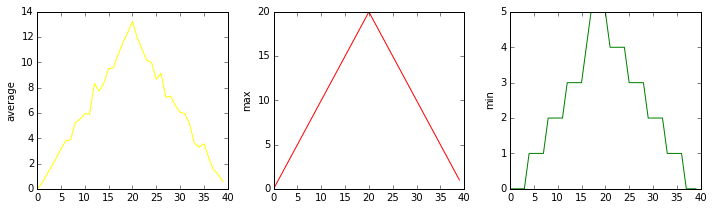

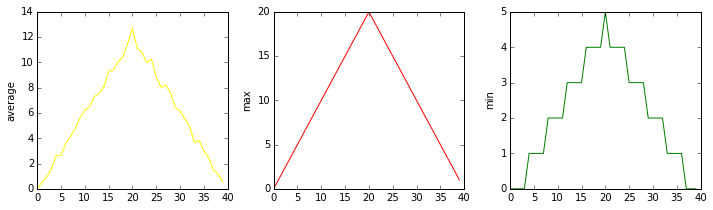

In [91]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

def analyze(filename):
    '''This function takes a filename as a parameter and displays three graphs - the mean, max and min 
    inflammation per day across all patients'''

    data = np.loadtxt(filename, delimiter=',')
    plt.figure(figsize=(10.0, 3.0))

    plt.subplot(1, 3, 3)
    plt.ylabel('min')
    plt.plot(data.min(0),'g')
    
    plt.subplot(1, 3, 1)
    plt.ylabel('average')
    plt.plot(data.mean(0),'yellow')

    plt.subplot(1, 3, 2)
    plt.ylabel('max')
    plt.plot(data.max(0),'r')

    plt.tight_layout()
    plt.show()

analyze('inflammation-01.csv')
analyze('inflammation-02.csv')
    

In [82]:
def rescale(array):
    ''' Takes an array as input and returns a corresponding array of values scaled to lie in the range 0.0 to 1.0'''
    L = array.min()
    H = array.max()
    return (array-L)/(H-L)

#help(numpy.arange)
#help (numpy.linspace)

test_array=numpy.arange(6.0)
print "original array is:", test_array
print "new array is:", rescale(test_array)

original array is: [ 0.  1.  2.  3.  4.  5.]
new array is: [ 0.   0.2  0.4  0.6  0.8  1. ]


In [110]:
def rescale_loop(array):
    ''' Takes an array as input and returns a corresponding array of values scaled to lie in the range 0.0 to 1.0'''
    L = array.min()
    H = array.max()
    
    new_array=[]
    
    for i in array:
        new_array.append((array[i]-L)/(H-L))
    
    return new_array

print "original array is:", test_array
print "new array is:", rescale_loop(test_array)
    

original array is: [ 0.  1.  2.  3.  4.  5.]
new array is: [0.0, 0.20000000000000001, 0.40000000000000002, 0.59999999999999998, 0.80000000000000004, 1.0]


#### Challenges

1.  Write a function called `analyze` that takes a filename as a parameter
    and displays the three graphs produced in the [previous lesson](01-numpy.ipynb),
    i.e.,
    `analyze('inflammation-01.csv')` should produce the graphs already shown,
    while `analyze('inflammation-02.csv')` should produce corresponding graphs for the second data set.
    Be sure to give your function a docstring.

2.  Write a function `rescale` that takes an array as input
    and returns a corresponding array of values scaled to lie in the range 0.0 to 1.0.
    (If $L$ and $H$ are the lowest and highest values in the original array,
    then the replacement for a value $v$ should be $(v-L) / (H-L)$.)
    Be sure to give the function a docstring.

3.  Run the commands `help(numpy.arange)` and `help(numpy.linspace)`
    to see how to use these functions to generate regularly-spaced values,
    then use those values to test your `rescale` function.

In [79]:
help(analyze)
help(rescale)

Help on function analyze in module __main__:

analyze(filename)
    This function takes a filename as a parameter and displays three graphs - the mean, max and min 
    inflammation per day across all patients

Help on function rescale in module __main__:

rescale(array)
    Takes an array as input and returns a corresponding array of values scaled to lie in the range 0.0 to 1.0



### Defining Defaults

We have passed parameters to functions in two ways:
directly, as in `span(data)`,
and by name, as in `numpy.loadtxt(fname='something.csv', delimiter=',')`.
In fact,
we can pass the filename to `loadtxt` without the `fname=`:

In [111]:
numpy.loadtxt('inflammation-01.csv', delimiter=',')

array([[ 0.,  0.,  1., ...,  3.,  0.,  0.],
       [ 0.,  1.,  2., ...,  1.,  0.,  1.],
       [ 0.,  1.,  1., ...,  2.,  1.,  1.],
       ..., 
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  0.,  2.,  0.],
       [ 0.,  0.,  1., ...,  1.,  1.,  0.]])

but we still need to say `delimiter=`:

In [112]:
numpy.loadtxt('inflammation-01.csv', ',')

TypeError: data type "," not understood

To understand what's going on,
and make our own functions easier to use,
let's re-define our `center` function like this:

In [113]:
def center(data, desired=0.0):
    '''Return a new array containing the original data centered around the desired value (0 by default).
    Example: center([1, 2, 3], 0) => [-1, 0, 1]'''
    return (data - data.mean()) + desired

The key change is that the second parameter is now written `desired=0.0` instead of just `desired`.
If we call the function with two arguments,
it works as it did before:

In [114]:
test_data = numpy.zeros((2, 2))
print center(test_data, 3)

[[ 3.  3.]
 [ 3.  3.]]


In [116]:
print center(test_data,2)

[[ 2.  2.]
 [ 2.  2.]]


But we can also now call it with just one parameter,
in which case `desired` is automatically assigned the [default value](../../gloss.html#default-parameter-value) of 0.0:

In [117]:
more_data = 5 + numpy.zeros((2, 2))
print 'data before centering:', more_data
print 'centered data:', center(more_data)

data before centering: [[ 5.  5.]
 [ 5.  5.]]
centered data: [[ 0.  0.]
 [ 0.  0.]]


This is handy:
if we usually want a function to work one way,
but occasionally need it to do something else,
we can allow people to pass a parameter when they need to
but provide a default to make the normal case easier.
The example below shows how Python matches values to parameters:

In [121]:
def display(a=1, b=2, c=3):
    print 'a:', a, 'b:', b, 'c:', c

print 'no parameters:'
display()
print 'one parameter:'
display(55)
print 'two parameters:'
display(55, 66)
print 'random parameters:'
display(55,c=89)

no parameters:
a: 1 b: 2 c: 3
one parameter:
a: 55 b: 2 c: 3
two parameters:
a: 55 b: 66 c: 3
random parameters:
a: 55 b: 2 c: 89


As this example shows,
parameters are matched up from left to right,
and any that haven't been given a value explicitly get their default value.
We can override this behavior by naming the value as we pass it in:

In [122]:
print 'only setting the value of c'
display(c=77)

only setting the value of c
a: 1 b: 2 c: 77


With that in hand,
let's look at the help for `numpy.loadtxt`:

In [ ]:
help(numpy.loadtxt)

There's a lot of information here,
but the most important part is the first couple of lines:

~~~python
loadtxt(fname, dtype=<type 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None,
        unpack=False, ndmin=0)
~~~

This tells us that `loadtxt` has one parameter called `fname` that doesn't have a default value,
and eight others that do.
If we call the function like this:

~~~python
numpy.loadtxt('inflammation-01.csv', ',')
~~~

then the filename is assigned to `fname` (which is what we want),
but the delimiter string `','` is assigned to `dtype` rather than `delimiter`,
because `dtype` is the second parameter in the list.
That's why we don't have to provide `fname=` for the filename,
but *do* have to provide `delimiter=` for the second parameter.

In [128]:
def normalize(array,lower=0,upper=1):
    ''' Takes an array as input and returns a corresponding array of values scaled to lie in the range 
    0.0 to 1.0 by default or the range specified by the user'''
    L = array.min()
    H = array.max()
    # (array-L)/(H-L) - scales the array to range [0,1]
    # *(upper-lower) - multiplies the scaled array by the new range you want to scale over
    # + lower - adds the lower bound value to the scale
    return ((array-L)/(H-L))*(upper-lower) + lower

test_array=numpy.arange(6.0)
print "original array is:", test_array
print "rescale array is:", rescale(test_array)
print "normalize array is:", normalize(test_array)
print "normalize array with different bounds is:", normalize(test_array,1.0,3.0)

original array is: [ 0.  1.  2.  3.  4.  5.]
rescale array is: [ 0.   0.2  0.4  0.6  0.8  1. ]
normalize array is: [ 0.   0.2  0.4  0.6  0.8  1. ]
normalize array with different bounds is: [ 1.   1.4  1.8  2.2  2.6  3. ]


In [129]:
def normalize_loop(array,lower=0,upper=1):
    ''' Takes an array as input and returns a corresponding array of values scaled to lie in the range 
    0.0 to 1.0 by default or the range specified by the user'''
    L = array.min()
    H = array.max()
    
    new_array=[]
    
    for i in array:
        new_array.append(((array[i]-L)/(H-L))*(upper-lower) + lower)
        
    return new_array

test_array=numpy.arange(6.0)
print "original array is:", test_array
print "rescale array is:", rescale(test_array)
print "normalize_loop array is:", normalize_loop(test_array)
print "normalize_loop array with different bounds is:", normalize_loop(test_array,1.0,3.0)


original array is: [ 0.  1.  2.  3.  4.  5.]
rescale array is: [ 0.   0.2  0.4  0.6  0.8  1. ]
normalize array is: [0.0, 0.20000000000000001, 0.40000000000000002, 0.59999999999999998, 0.80000000000000004, 1.0]
normalize array with different bounds is: [1.0, 1.3999999999999999, 1.8, 2.2000000000000002, 2.6000000000000001, 3.0]


#### Challenges

1.  Rewrite the `normalize` function so that it scales data to lie between 0.0 and 1.0 by default,
    but will allow the caller to specify lower and upper bounds if they want.
    Compare your implementation to your neighbor's:
    do the two functions always behave the same way?

#### Key Points

*   Define a function using `def name(...params...)`.
*   The body of a function must be indented.
*   Call a function using `name(...values...)`.
*   Numbers are stored as integers or floating-point numbers.
*   Integer division produces the whole part of the answer (not the fractional part).
*   Each time a function is called, a new stack frame is created on the [call stack](../../gloss.html#call-stack) to hold its parameters and local variables.
*   Python looks for variables in the current stack frame before looking for them at the top level.
*   Use `help(thing)` to view help for something.
*   Put docstrings in functions to provide help for that function.
*   Specify default values for parameters when defining a function using `name=value` in the parameter list.
*   Parameters can be passed by matching based on name, by position, or by omitting them (in which case the default value is used).

#### Next Steps

We now have a function called `analyze` to visualize a single data set.
We could use it to explore all 12 of our current data sets like this:

~~~python
analyze('inflammation-01.csv')
analyze('inflammation-02.csv')
...
analyze('inflammation-12.csv')
~~~

but the chances of us typing all 12 filenames correctly aren't great,
and we'll be even worse off if we get another hundred files.
What we need is a way to tell Python to do something once for each file,
and that will be the subject of the next lesson.